# **Setup**

In [24]:
import yfinance as yf
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Import**

In [25]:
# SP500= yf.tickers('^GSPC')
SP500_Data = yf.Ticker("^GSPC").history(period='max')
SP500_Data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-22 00:00:00-05:00,4553.040039,4568.430176,4545.049805,4556.620117,3042810000,0.0,0.0
2023-11-24 00:00:00-05:00,4555.839844,4560.310059,4552.799805,4559.339844,1639500000,0.0,0.0
2023-11-27 00:00:00-05:00,4554.859863,4560.520020,4546.319824,4550.430176,3403990000,0.0,0.0


# **Plot Closing Price**

<Axes: xlabel='Date'>

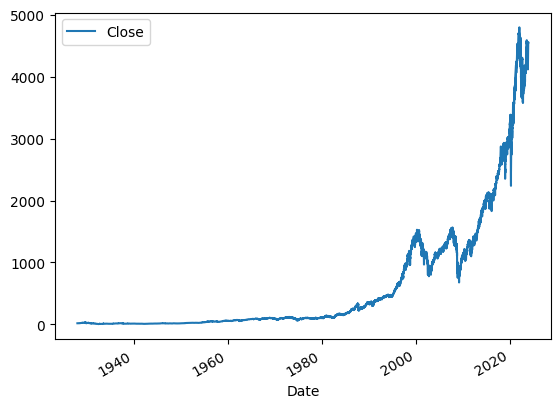

In [26]:
# Incorrect Code
# SP500_Data.plot.line(x=SP500_Data.index,y='Close')

# Correct Code
SP500_Data.plot.line(y='Close',use_index=True)

# **Data Cleaning**

In [27]:
SP500_Data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

## **Remove Cols**

In [28]:
del SP500_Data['Dividends']
del SP500_Data['Stock Splits']

In [29]:
SP500_Data.head()

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0


## **Remove Old Data**
* To factor in modern day dynamics & trends

In [30]:
print('Data Shape Before: ',SP500_Data.shape)

SP500_Data = SP500_Data.loc['1990-01-01':].copy()
print('Data Shape After: ',SP500_Data.shape)

Data Shape Before:  (24094, 5)
Data Shape After:  (8544, 5)


In [31]:
SP500_Data.head()

,Open,High,Low,Close,Volume
Date,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000


# **Add Target Data**

In [32]:
SP500_Data['Tomorrow'] = SP500_Data['Close'].shift(-1)
SP500_Data.head()

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995


In [33]:
# Add Variable To Indicate If the price went up or down
SP500_Data['Target'] = (SP500_Data['Tomorrow'] > SP500_Data['Close']).astype(int)
SP500_Data.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0


# **Data Models**

## **Model 01 - Random Forest**